<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Download-images" data-toc-modified-id="Download-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download images</a></span></li><li><span><a href="#Embed-faces" data-toc-modified-id="Embed-faces-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Embed faces</a></span></li><li><span><a href="#Download-and-embed" data-toc-modified-id="Download-and-embed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Download and embed</a></span></li></ul></div>

In [2]:
from query.datasets.prelude import *
from query.datasets.ingest import ingest_pose
import pyspark.sql.functions as func

# Download images

In [3]:
IMG_DOWNLOAD_DIR = '/app/google_images'
TMP_DOWNLOAD_DIR = '/tmp/google_img_download'

In [4]:
import os
import json
import shutil
import cv2
from google_images_download import google_images_download


def fetch_images(name, n=25, outdir=IMG_DOWNLOAD_DIR, query_extras='tv host', force=False):
    out_subdir =  os.path.join(outdir, name)
    if os.path.exists(out_subdir):
        if not force:
            print('Using cached', out_subdir)
            return
        else:
            shutil.rmtree(out_subdir)

    query = '"%s"' % name
    if query_extras:
        query += ' %s' % query_extras

    response = google_images_download.googleimagesdownload()
    response.download({
        'keywords': query, 'limit': n,
        'output_directory': TMP_DOWNLOAD_DIR, 'format': 'jpg', 'size': 'medium'
    })
    
    tmpdir = os.path.join(TMP_DOWNLOAD_DIR, query)
    for ent in os.listdir(tmpdir):
        imgpath = os.path.join(tmpdir, ent)
        im = cv2.imread(imgpath)
        if im is None:
            os.remove(imgpath)
    
    shutil.move(tmpdir, out_subdir)
    return out_subdir


In [5]:
curated_hosts = {
  "Hannity": {
    "producers": [],
    "hosts": ["Sean Hannity"]
  },
  "Happening Now": {
    "producers": [],
    "hosts": ["John Scott", "Melissa Francis"]
  },
  "All In With Chris Hayes": {
    "producers": [],
    "hosts": ["Chris Hayes"]
  },
  "Shepard Smith Reporting": {
    "producers": [],
    "hosts": ["Shepard Smith"]
  },
  "CNN Newsroom With Poppy Harlow": {
    "producers": [],
    "hosts": ["Poppy Harlow"]
  },
  "On the Record With Greta Van Susteren": {
    "producers": [],
    "hosts": ["Greta Van Susteren"]
  },
  "The OReilly Factor": {
    "producers": ["Bill O'Reilly"],
    "hosts": ["Bill O'Reilly"]
  },
  "The Kelly File": {
    "producers": [],
    "hosts": ["Megyn Kelly"]
  },
  "CNN Newsroom With Carol Costello": {
    "producers": [],
    "hosts": ["Carol Costello"]
  },
  "Americas Newsroom With Bill Hemmer and Martha MacCallum": {
    "producers": [],
    "hosts": ["Bill Hemmer", "Martha MacCallum"]
  },
  "Americas News HQ": {
    "producers": [],
    "hosts": ["Uma Pemmaraju", "Shannon Beam", "Kelly Wright", "Eric Shawn", "Arthel Neville", "Janice Dean", "Elizabeth Prann", "Doug McKelway", "Molly Henneberg", "Peter Doocy", "Bryan Llenas"]
  },
  "The Last Word With Lawrence ODonnell": {
    "producers": [],
    "hosts": ["Lawrence O'Donnell"]
  },
  "Hardball With Chris Matthews": {
    "producers": ["Ray Herbert"],
    "hosts": ["Chris Matthews"]
  },
  "Morning Joe": {
    "producers": ["Alex Korson", "Mike Buczkiewicz"],
    "hosts": ["Joe Scarborough", "Mika Brzezinski", "Willie Geist"]
  },
  "The 11th Hour With Brian Williams": {
    "producers": ["Julie Morse", "Patrick Burkey"],
    "hosts": ["Brian Williams"]
  },
  "Early Start With John Berman and Christine Romans": {
    "producers": [],
    "hosts": ["Christine Romans", "John Berman"]
  },
  "Outnumbered": {
    "producers": [],
    "hosts": ["Harris Faulkner", "Sandra Smith"]
  },
  "The Place for Politics 2016": {
    "producers": [],
    "hosts": ["Ari Melber", "Frances Rivera"]
  },
  "CNN Tonight With Don Lemon": {
    "producers": [],
    "hosts": ["Don Lemon"]
  },
  "Your World With Neil Cavuto": {
    "producers": [],
    "hosts": ["Neil Cavuto"]
  },
  "Anderson Cooper 360": {
    "producers": ["Charles Moore"],
    "hosts": ["Anderson Cooper"]
  },
  "CNN Newsroom With Fredricka Whitfield": {
    "producers": [],
    "hosts": ["Fredricka Whitfield"]
  },
  "CNN Newsroom Live": {
    "producers": [],
    "hosts": ["Brooke Baldwin", "John Berman", "Victor Blackwell", "Ana Cabrera", "Poppy Harlow", "Christi Paul", "Fredricka Whitfield"]
  },
  "CNN Newsroom With Brooke Baldwin": {
    "producers": [],
    "hosts": ["Brooke Baldwin"]
  },
  "MTP Daily": {
    "producers": ["John Reiss"],
    "hosts": ["Chuck Todd"]
  },
  "Wolf": {
    "producers": [],
    "hosts": ["Wolf Blitzer"]
  },
  "MSNBC Live": {
    "producers": [],
    "hosts": ["Brian Williams", "Chris Jansing", "Stephanie Ruhle", "Ali Velshi", "Hallie Jackson", "Craig Melvin", "Katy Tur", "Richard Lui"]
  },
  "The Rachel Maddow Show": {
    "producers": ["Rob Katko", "Bill Wolff", "Cory Gnazzo"],
    "hosts": ["Rachel Maddow"]
  },
  "New Day": {
    "producers": ["Javier Morgado"],
    "hosts": ["Chris Cuomo", "Alisyn Camerota", "Victor Blackwell", "Christi Paul"]
  },
  "The Lead With Jake Tapper": {
    "producers": ["Federico S. Quadrani"],
    "hosts": ["Jake Tapper"]
  },
  "Americas Newsroom": {
    "producers": [],
    "hosts": ["Bill Hemmer", "Sandra Smith"]
  },
  "Andrea Mitchell Reports": {
    "producers": [],
    "hosts": ["Andrea Mitchell"]
  },
  "The Five": {
    "producers": [],
    "hosts": ["Jesse Watters", "Kimberly Guilfoyle", "Greg Gutfeld", "Dana Perino", "Juan Williams"]
  },
  "Justice With Judge Jeanine": {
    "producers": [],
    "hosts": ["Jeanine Pirro"]
  },
  "FOX  Friends": {
    "producers": [],
    "hosts": ["Steve Doocy", "Ainsley Earhardt", "Brian Kilmeade", "Pete Hegseth", "Abby Huntsman", "Griff Jenkins"]
  },
  "Situation Room With Wolf Blitzer": {
    "producers": [],
    "hosts": ["Wolf Blitzer"]
  },
  "Erin Burnett OutFront": {
    "producers": [],
    "hosts": ["Erin Burnett"]
  },
  "Tucker Carlson Tonight": {
    "producers": [],
    "hosts": ["Tucker Carlson"]
  },
  "Special Report With Bret Baier": {
    "producers": [],
    "hosts": ["Bret Baier"]
  }
}

In [6]:
for k, v in curated_hosts.items():
    for host in v['hosts']:
        print('Downloading images for:', host)
        fetch_images(host)

Using cached /app/google_images/Anderson Cooper
Using cached /app/google_images/Lawrence O'Donnell
Using cached /app/google_images/Neil Cavuto
Using cached /app/google_images/Harris Faulkner
Using cached /app/google_images/Sandra Smith
Using cached /app/google_images/Jake Tapper
Using cached /app/google_images/Bill Hemmer
Using cached /app/google_images/Martha MacCallum
Using cached /app/google_images/Ari Melber
Using cached /app/google_images/Frances Rivera
Using cached /app/google_images/Jesse Watters
Using cached /app/google_images/Kimberly Guilfoyle
Using cached /app/google_images/Greg Gutfeld
Using cached /app/google_images/Dana Perino
Using cached /app/google_images/Juan Williams
Using cached /app/google_images/Uma Pemmaraju
Using cached /app/google_images/Shannon Beam
Using cached /app/google_images/Kelly Wright
Using cached /app/google_images/Eric Shawn
Using cached /app/google_images/Arthel Neville
Using cached /app/google_images/Janice Dean
Using cached /app/google_images/Eli

# Embed faces

In [7]:
EMBEDDINGS_DIR = '/app/face_embeddings'

In [8]:
import cv2
import os
import sys
import math
import tensorflow as tf
import numpy as np
import align.detect_face
import facenet
import _pickle as pickle
from collections import namedtuple

BoundingBox = namedtuple('BoundingBox', ['x1', 'x2', 'y1', 'y2'])

KB = 1024

MTCNN_MODEL_DIR = '/app/embed/align'
FACENET_MODEL_DIR = '/app/embed/facenet/20170512-110547'


def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('indir')
    parser.add_argument('outfile')
    return parser.parse_args()


def file_size(filename):
    st = os.stat(filename)
    return st.st_size


class MTCNN(object):

    def __init__(self):
        self.graph = tf.Graph()
        self.graph.as_default()

        tf_config = tf.ConfigProto(allow_soft_placement=True)
        self.session = tf.Session(config=tf_config)
        self.session.as_default()

        print('Loading model...')
        self.pnet, self.rnet, self.onet = \
            align.detect_face.create_mtcnn(self.session, MTCNN_MODEL_DIR)
        print('Model loaded!')


    def face_detect(self, imgs):
        threshold = [0.45, 0.6, 0.7]
        factor = 0.709
        vmargin = 0.2582651235637604
        hmargin = 0.3449094129917718
        detection_window_size_ratio = .2

        detections = align.detect_face.bulk_detect_face(
            imgs, detection_window_size_ratio, self.pnet, self.rnet, self.onet,
            threshold, factor)

        batch_faces = []
        for img, bounding_boxes in zip(imgs, detections):
            if bounding_boxes is None:
                batch_faces.append([])
                continue
            frame_faces = []
            bounding_boxes = bounding_boxes[0]
            num_faces = bounding_boxes.shape[0]
            for i in range(num_faces):
                confidence = bounding_boxes[i][4]
                if confidence < .8:
                    continue

                img_size = np.asarray(img.shape)[0:2]
                det = np.squeeze(bounding_boxes[i][0:4])
                vmargin_pix = int((det[2] - det[0]) * vmargin)
                hmargin_pix = int((det[3] - det[1]) * hmargin)
                frame_faces.append(
                    BoundingBox(
                        x1=np.maximum(det[0] - hmargin_pix / 2, 0),
                        y1=np.maximum(det[1] - vmargin_pix / 2, 0),
                        x2=np.minimum(det[2] + hmargin_pix / 2, img_size[1]),
                        y2=np.minimum(det[3] + vmargin_pix / 2, img_size[0])))

            batch_faces.append(frame_faces)
        return batch_faces

    def close(self):
        self.session.close()


class FaceNetEmbed(object):

    def __init__(self):
        self.in_size = 160
        self.graph = tf.Graph()
        self.graph.as_default()

        tf_config = tf.ConfigProto(allow_soft_placement=True)
        self.session = tf.Session(config=tf_config)
        self.session.as_default()

        meta_file, ckpt_file = facenet.get_model_filenames(FACENET_MODEL_DIR)
        g = tf.Graph()
        g.as_default()
        saver = tf.train.import_meta_graph(os.path.join(FACENET_MODEL_DIR, meta_file))
        saver.restore(self.session, os.path.join(FACENET_MODEL_DIR, ckpt_file))

        self.images_placeholder = tf.get_default_graph().get_tensor_by_name('input:0')
        self.embeddings = tf.get_default_graph().get_tensor_by_name('embeddings:0')
        self.phase_train_placeholder = tf.get_default_graph().get_tensor_by_name('phase_train:0')

    def embed(self, img):
        [fh, fw] = img.shape[:2]
        if fh == 0 or fw == 0:
            return np.zeros(128, dtype=np.float32).tobytes()
        else:
            img = cv2.resize(img, (self.in_size, self.in_size))
            img = facenet.prewhiten(img)
            embs = self.session.run(
                self.embeddings,
                feed_dict={
                    self.images_placeholder: [img],
                    self.phase_train_placeholder: False
                })
            return embs[0]

        
face_detector = MTCNN()
face_embeddor = FaceNetEmbed()

Loading model...
Model loaded!
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /app/embed/facenet/20170512-110547/model-20170512-110547.ckpt-250000


In [23]:
def embed_directory(name_path):
    if not os.path.isdir(name_path):
        return None
    print('Reading images in:', name_path)

    raw_images = []
    image_paths = []
    for img in os.listdir(name_path):
        img_path = os.path.join(name_path, img)
        if not os.path.isfile(img_path):
            continue
        if file_size(img_path) < 5 * KB:
            continue
        im = cv2.imread(img_path)
        if im is None:
            continue
        raw_images.append(im)
        image_paths.append(img_path)

    detected_faces = face_detector.face_detect(raw_images)
    cropped_images = []
    for img_path, img, detections in zip(image_paths, raw_images,
                                         detected_faces):
        if len(detections) == 0:
            print ('Failed to detect faces:', img_path)
            continue
        if len(detections) > 1:
            print ('Multiple faces detected:', img_path)
            continue
        box = detections[0]
        print ('Image:', img_path, box)
        x1 = int(math.floor(box.x1))
        x2 = int(math.ceil(box.x2))
        y1 = int(math.floor(box.y1))
        y2 = int(math.ceil(box.y2))
        cropped_images.append(img[y1:y2, x1:x2, :])

    # detect faces
    embs = []
    for img in cropped_images:
        if img.size == 0:
            continue
        emb = face_embeddor.embed(img)
        embs.append(emb)

    if len(embs) == 0:
        print('No embeddings:', name_path)
        return None

    emb_0 = embs[0]
    emb_mean = np.mean(embs, axis=0)
    assert emb_mean.shape == emb_0.shape
    return emb_mean

In [24]:
import _pickle as pickle

# Embed the hosts
for show, data in curated_hosts.items():
    for host in data['hosts']:
        print ('Generating embedding:', host)
        emb = embed_directory(os.path.join(IMG_DOWNLOAD_DIR, host))
        if emb is None:
            print('Failed to embed', host, file=sys.stderr)
        else:
            emb_file = os.path.join(EMBEDDINGS_DIR, '%s.pkl' % host)
            with open(emb_file, 'wb') as f:
                pickle.dump(emb, f, protocol=2)

Generating embedding: Anderson Cooper
Reading images in: /app/google_images/Anderson Cooper
Image: /app/google_images/Anderson Cooper/19. 08012016%2bac360%2b1.jpg BoundingBox(x1=374.56744366884232, x2=575.33968913555145, y1=66.033813893795013, y2=286.54254853725433)
Image: /app/google_images/Anderson Cooper/17. 11302015%2bac360.jpg BoundingBox(x1=277.05913102626801, x2=508.0276712179184, y1=65.21371591091156, y2=311.3590213060379)
Failed to detect faces: /app/google_images/Anderson Cooper/8. bring-back-the-mole-with-anderson-2-20035-1441824043-6_dblbig.jpg
Image: /app/google_images/Anderson Cooper/16. article-0-16e6d418000005dc-226_306x653.jpg BoundingBox(x1=104.52102756500244, x2=196.67035654187202, y1=17.985148027539253, y2=122.55268228054047)
Image: /app/google_images/Anderson Cooper/1. anderson-cooper.jpg BoundingBox(x1=146.4696549102664, x2=339.61531141400337, y1=67.764166682958603, y2=274.32128209620714)
Image: /app/google_images/Anderson Cooper/2. 15145_0228-560x400.jpg Bounding

Generating embedding: Neil Cavuto
Reading images in: /app/google_images/Neil Cavuto
Image: /app/google_images/Neil Cavuto/8. 5a00d1bc58a0c11e008b71f3-750-375.jpg BoundingBox(x1=281.62841886281967, x2=482.38386408984661, y1=43.644081309437752, y2=258.57012665085495)
Image: /app/google_images/Neil Cavuto/25. cavuto-thumb-700xauto-186909.jpg BoundingBox(x1=272.36387625336647, x2=405.44591358304024, y1=71.66110235452652, y2=212.20566445589066)
Image: /app/google_images/Neil Cavuto/1. getfile.asp BoundingBox(x1=235.38324385881424, x2=381.18284893035889, y1=68.215812861919403, y2=219.7877551317215)
Image: /app/google_images/Neil Cavuto/15. 1399915643000-untitled-13-2.jpg BoundingBox(x1=213.50268828868866, x2=339.10721692442894, y1=34.856139495968819, y2=168.18069563433528)
Image: /app/google_images/Neil Cavuto/14. neil-cuvoto-fights-ms.jpg BoundingBox(x1=410.07543072104454, x2=531.31105655431747, y1=77.28931599855423, y2=207.65794930234551)
Failed to detect faces: /app/google_images/Neil Cav

Generating embedding: Sandra Smith
Reading images in: /app/google_images/Sandra Smith
Image: /app/google_images/Sandra Smith/20. is-fox-news-tomboy-sandra-smith-on-the-verge-of-divorcing-her-husband-john-connelly.jpg BoundingBox(x1=341.73476445674896, x2=475.521714001894, y1=58.770877420902252, y2=201.89019095897675)
Failed to detect faces: /app/google_images/Sandra Smith/13. abc65c7421ed68e555fb5eb758fdd3bc.jpg
Failed to detect faces: /app/google_images/Sandra Smith/15. 0.jpg
Image: /app/google_images/Sandra Smith/8. gettyimages-1203733253-e1452798458540.jpg BoundingBox(x1=255.57169651985168, x2=412.04340948164463, y1=113.48033806681633, y2=279.38491935189813)
Image: /app/google_images/Sandra Smith/7. 101714_on_smith_640.jpg BoundingBox(x1=204.28817027062178, x2=429.44439779222012, y1=45.979042701423168, y2=284.95344854146242)
Image: /app/google_images/Sandra Smith/18. sandra_smith_a_l.jpg BoundingBox(x1=383.34750127792358, x2=546.77268636226654, y1=81.385170817375183, y2=259.91978903

Generating embedding: Martha MacCallum
Reading images in: /app/google_images/Martha MacCallum
Image: /app/google_images/Martha MacCallum/9. martha-maccallum-e1522419636350.jpg BoundingBox(x1=204.64587642252445, x2=377.56014955788851, y1=117.23618900775909, y2=305.19558453559875)
Image: /app/google_images/Martha MacCallum/21. 4a2dec49976127db311e7fa632e50d86.jpg BoundingBox(x1=139.25193187594414, x2=325.70803105831146, y1=71.44680917263031, y2=266.23735772073269)
Multiple faces detected: /app/google_images/Martha MacCallum/22. hemmer-maccallum.jpg
Image: /app/google_images/Martha MacCallum/18. cd2c9402b6a4bab4efc72eb5954eac97.jpg BoundingBox(x1=106.75199767202139, x2=434.20965055376291, y1=157.61122336238623, y2=505.60078381001949)
Image: /app/google_images/Martha MacCallum/1. news-anchor-martha-maccallum-is-happily-married-to-daniel-john-her-husband-for-24-years-now.jpg BoundingBox(x1=262.16854657232761, x2=472.72139333933592, y1=77.016467019915581, y2=294.90054692421108)
Image: /app/g

Generating embedding: Jesse Watters
Reading images in: /app/google_images/Jesse Watters
Image: /app/google_images/Jesse Watters/24. t_ BoundingBox(x1=602.94685024023056, x2=707.33087611198425, y1=83.80803370475769, y2=196.03954873979092)
Image: /app/google_images/Jesse Watters/5. jesse-watters-announces-vacation__opt.jpg BoundingBox(x1=215.77999341487885, x2=342.86965721845627, y1=40.963466167449951, y2=174.26444505900145)
Image: /app/google_images/Jesse Watters/4. jesse-watters-five-things-ftr.jpg BoundingBox(x1=151.24012500047684, x2=376.15030279755592, y1=30.192745164036751, y2=276.27994850464165)
Image: /app/google_images/Jesse Watters/9. jesse-watters-e1489839820352.jpg BoundingBox(x1=273.84248983860016, x2=495.14763617515564, y1=94.815245151519775, y2=331.64310742914677)
Image: /app/google_images/Jesse Watters/6. jesse_watters.jpg BoundingBox(x1=202.72153578698635, x2=407.1346044242382, y1=55.688515592366457, y2=274.95847602188587)
Multiple faces detected: /app/google_images/Jess

Generating embedding: Greg Gutfeld
Reading images in: /app/google_images/Greg Gutfeld
Image: /app/google_images/Greg Gutfeld/18. gutfeld-greg-919x517.jpg BoundingBox(x1=380.22480610013008, x2=620.87902581691742, y1=71.853489398956299, y2=332.06537091732025)
Image: /app/google_images/Greg Gutfeld/3. greg-gutfeld-show-fox-news.jpg BoundingBox(x1=497.47672280669212, x2=620.46298509836197, y1=37.150405012071133, y2=166.36669202893972)
Image: /app/google_images/Greg Gutfeld/19. hqdefault.jpg BoundingBox(x1=201.03401432931423, x2=309.46032032370567, y1=77.790838941931725, y2=198.16455629467964)
Image: /app/google_images/Greg Gutfeld/5. hqdefault.jpg BoundingBox(x1=260.27002906799316, x2=371.18846169486642, y1=77.395454868674278, y2=196.8071109354496)
Image: /app/google_images/Greg Gutfeld/25. 18081324-mmmain.jpg BoundingBox(x1=446.90517182275653, x2=527.65746008604765, y1=25.575860492885113, y2=110.94004806876183)
Multiple faces detected: /app/google_images/Greg Gutfeld/21. gutfeld062517.jpg

Generating embedding: Juan Williams
Reading images in: /app/google_images/Juan Williams
Image: /app/google_images/Juan Williams/14. 732051ce52e3ae6fbf4d81bb012c9823.jpg BoundingBox(x1=320.90800434350967, x2=387.9952679425478, y1=85.442170962691307, y2=158.08409709855914)
Image: /app/google_images/Juan Williams/20. a5a759db3c62ef08b30bd816663ab168.jpg BoundingBox(x1=369.36971625685692, x2=430.16699755191803, y1=98.218342777341604, y2=163.35377023741603)
Multiple faces detected: /app/google_images/Juan Williams/21. fox-news-juan-williams-and-wife-susan-delise-married-for-48-years-without-any-rumors-of-divorce.jpg
Image: /app/google_images/Juan Williams/12. 259537.jpg BoundingBox(x1=259.31109207868576, x2=383.25772489607334, y1=46.106835126876831, y2=182.42667739093304)
Image: /app/google_images/Juan Williams/11. http%3a%2f%2fo.aolcdn.com%2fhss%2fstorage%2fmidas%2f1361a6c1edc2ac6f078b916cbc10e7cc%2f203712080%2frtr4byjt.jpeg BoundingBox(x1=388.97317779809237, x2=599.30336518585682, y1=127.

Generating embedding: Shannon Beam
Reading images in: /app/google_images/Shannon Beam
Image: /app/google_images/Shannon Beam/4. 0.jpg BoundingBox(x1=187.18320424109697, x2=286.5112693682313, y1=88.42444758862257, y2=194.37650524824858)
Image: /app/google_images/Shannon Beam/2. 169937163.jpg BoundingBox(x1=247.82234810292721, x2=409.93555518984795, y1=47.525693312287331, y2=219.13761336915195)
Failed to detect faces: /app/google_images/Shannon Beam/19. hqdefault.jpg
Image: /app/google_images/Shannon Beam/5. hqdefault.jpg BoundingBox(x1=275.79268886893988, x2=371.09208545088768, y1=77.546471066772938, y2=179.83527521044016)
Image: /app/google_images/Shannon Beam/17. chris-evans_0.jpg BoundingBox(x1=383.73857265710831, x2=593.76546701788902, y1=58.693132668733597, y2=281.57507511973381)
Failed to detect faces: /app/google_images/Shannon Beam/23. hqdefault.jpg
Failed to detect faces: /app/google_images/Shannon Beam/9. amy-schumer-stephen-colbert-honeymoon.jpg
Multiple faces detected: /app/

Generating embedding: Arthel Neville
Reading images in: /app/google_images/Arthel Neville
Image: /app/google_images/Arthel Neville/18. arthel-neville.jpg BoundingBox(x1=55.730518892407417, x2=366.98569938540459, y1=55.798623371869326, y2=386.31233419850469)
Image: /app/google_images/Arthel Neville/20. 0d5484a3a8c7654cbbb4b160f4a86e0b--satin-blouses-white-blouses.jpg BoundingBox(x1=28.855023324489594, x2=275.78829598426819, y1=87.722509145736694, y2=350.41914129257202)
Failed to detect faces: /app/google_images/Arthel Neville/21. antibacterialsoap.jpg
Image: /app/google_images/Arthel Neville/3. fox_anhq_gohmert_iran_150329e-800x430.jpg BoundingBox(x1=500.54003244638443, x2=594.35197961330414, y1=59.810924630612135, y2=168.07021693140268)
Image: /app/google_images/Arthel Neville/23. arthel_black-alternate2_2_t580.jpg BoundingBox(x1=193.60315604507923, x2=383.95679688453674, y1=69.523485749959946, y2=274.80627134628594)
Image: /app/google_images/Arthel Neville/16. journalist-arthel-nevill

Generating embedding: Doug McKelway
Reading images in: /app/google_images/Doug McKelway
Image: /app/google_images/Doug McKelway/3. doug-mckelway.jpg BoundingBox(x1=133.11304524540901, x2=312.74624294787645, y1=61.249093025922775, y2=252.88519950211048)
Image: /app/google_images/Doug McKelway/19. dougmckelway.jpg BoundingBox(x1=188.09261220693588, x2=308.39187147468328, y1=32.218905828893185, y2=161.57515893876553)
Image: /app/google_images/Doug McKelway/8. doug-mckelway-f58765d9-0961-4d2a-94eb-edef2efe2d2-resize-750.jpg BoundingBox(x1=274.1727731525898, x2=412.43581911921501, y1=62.303687691688538, y2=210.47044068574905)
Image: /app/google_images/Doug McKelway/18. 7dd408a9eee91bfbcfc9a41ae414a587--navy-sailor-sailors.jpg BoundingBox(x1=193.99602282047272, x2=292.33424800634384, y1=90.717191338539124, y2=198.41005861759186)
Multiple faces detected: /app/google_images/Doug McKelway/4. doug-mckelway.jpg
Image: /app/google_images/Doug McKelway/25. doug-mckelway-8a5ed6cb-b3a5-44cd-910c-a52d

Generating embedding: Peter Doocy
Reading images in: /app/google_images/Peter Doocy
Multiple faces detected: /app/google_images/Peter Doocy/17. 111114_shep_doocy_640.jpg
Image: /app/google_images/Peter Doocy/14. 2013-12-06-stephen%20james%20doocy.jpg BoundingBox(x1=98.409753948450089, x2=244.77421118319035, y1=45.448712348937988, y2=200.16116115637124)
Image: /app/google_images/Peter Doocy/25. ?url=https%3a%2f%2fstatic.politico.com%2f74%2ffa%2f8acb73264a2fa04c3e8720e6d181%2ffox-and-friends.jpg.jpg BoundingBox(x1=186.80292980372906, x2=302.87055595219135, y1=120.32655040919781, y2=246.13568332232535)
Multiple faces detected: /app/google_images/Peter Doocy/10. doocy-family-e1489086219253.jpg
Image: /app/google_images/Peter Doocy/8. peter-doocy-b0ef4b00-6ee4-465c-b261-1c041c7e186-resize-750.jpeg BoundingBox(x1=120.14175636321306, x2=351.35674923658371, y1=74.211459040641785, y2=324.59489353187382)
Multiple faces detected: /app/google_images/Peter Doocy/5. img_3433-copy-9c021361.jpeg
Image

Generating embedding: Sean Hannity
Reading images in: /app/google_images/Sean Hannity
Image: /app/google_images/Sean Hannity/21. hannity.jpg BoundingBox(x1=388.16293168067932, x2=508.2744300365448, y1=51.025440365076065, y2=180.66413991898298)
Image: /app/google_images/Sean Hannity/7. 2018-04-17t184457z_1_lynxmpee3g1on-oustp_rtroptp_3_news-us-fox-hannity.jpg BoundingBox(x1=297.93549421429634, x2=506.66842523217201, y1=69.225456431508064, y2=286.12095319479704)
Image: /app/google_images/Sean Hannity/24. 570fc58d1900002e0056b36c.jpeg BoundingBox(x1=153.10600078105927, x2=335.74266721308231, y1=36.097524190321565, y2=223.88751941919327)
Image: /app/google_images/Sean Hannity/4. sean.jpg BoundingBox(x1=514.57819225639105, x2=783.79070290923119, y1=84.273020148277283, y2=369.38935281476006)
Image: /app/google_images/Sean Hannity/18. sean-hannity-073014-800x430.jpg BoundingBox(x1=349.03461408615112, x2=563.82197952270508, y1=58.719622135162354, y2=285.07758045196533)
Image: /app/google_image

Generating embedding: John Berman
Reading images in: /app/google_images/John Berman
Image: /app/google_images/John Berman/18. 2012-01-12-abc-gma-berman.jpg BoundingBox(x1=168.13380345702171, x2=295.25109112262726, y1=52.022275038063526, y2=192.72621736675501)
Multiple faces detected: /app/google_images/John Berman/13. kate.jpg
Failed to detect faces: /app/google_images/John Berman/24. john-berman-trump-mediaedited.jpg
Image: /app/google_images/John Berman/1. 140325104338-john-berman-profile-super-169.jpg BoundingBox(x1=668.24782662093639, x2=833.2669476121664, y1=106.4827387034893, y2=287.45042587816715)
Image: /app/google_images/John Berman/6. 150514050825-earlystart-john-berman-wins-at-jeopardy-00013301-super-169.jpg BoundingBox(x1=533.65537109971046, x2=667.39916878193617, y1=93.157863438129425, y2=238.51014459133148)
Multiple faces detected: /app/google_images/John Berman/22. n-berman-world-cup-628x314.jpg
Image: /app/google_images/John Berman/7. k3z20n18-720.jpg BoundingBox(x1=473

Generating embedding: Chris Hayes
Reading images in: /app/google_images/Chris Hayes
Image: /app/google_images/Chris Hayes/6. 151005184029-chris-hayes-msnbc-780x439.jpg BoundingBox(x1=251.44320742785931, x2=474.71514631062746, y1=61.962930560112, y2=294.49404342472553)
Image: /app/google_images/Chris Hayes/10. article-2151055-13564ccb000005dc-59_634x427.jpg BoundingBox(x1=218.04979526251554, x2=382.69973319768906, y1=67.380884900689125, y2=235.44845067150891)
Image: /app/google_images/Chris Hayes/12. 7696.jpg BoundingBox(x1=226.13726769387722, x2=412.56107550859451, y1=56.576278626918793, y2=244.70593403838575)
Image: /app/google_images/Chris Hayes/23. with%20his%20wife%20kate%20shaw%20chris%20hayes.jpg BoundingBox(x1=221.44338254630566, x2=293.36638877168298, y1=86.746366612613201, y2=164.53962609451264)
Image: /app/google_images/Chris Hayes/5. chris-hayes.jpg BoundingBox(x1=157.9342638105154, x2=403.2726965919137, y1=69.426770687103271, y2=328.00064320117235)
Image: /app/google_images

Generating embedding: Wolf Blitzer
Reading images in: /app/google_images/Wolf Blitzer
Multiple faces detected: /app/google_images/Wolf Blitzer/10. wolf-blitzer-katrina-pierson-060616-800x430.jpg
Image: /app/google_images/Wolf Blitzer/2. 140324160316-wolf-blitzer-profile-super-169.jpg BoundingBox(x1=679.60320084542036, x2=919.76971944794059, y1=139.68036972731352, y2=397.70584333874285)
Image: /app/google_images/Wolf Blitzer/5. hqdefault.jpg BoundingBox(x1=173.31343424320221, x2=303.30154260993004, y1=70.671089112758636, y2=204.68758090399206)
Image: /app/google_images/Wolf Blitzer/1. wolf-blitzer-the-situation-room.jpg BoundingBox(x1=250.60390487313271, x2=416.63594288378954, y1=66.900410234928131, y2=241.37191445380449)
Image: /app/google_images/Wolf Blitzer/14. u0qxe5o0tbaw3fpfaud2.jpg BoundingBox(x1=72.382929801940918, x2=184.3395357131958, y1=40.05541555583477, y2=159.5271761957556)
Failed to detect faces: /app/google_images/Wolf Blitzer/18. hqdefault.jpg
Multiple faces detected: /

Generating embedding: Willie Geist
Reading images in: /app/google_images/Willie Geist
Failed to detect faces: /app/google_images/Willie Geist/25. today-show-willie-geist-natalie-morales-fired-co-hosts-executive-cast-shakeup__opt.jpg
Multiple faces detected: /app/google_images/Willie Geist/12. 1513876725325.jpg
Failed to detect faces: /app/google_images/Willie Geist/18. christina-geist-pic-3.jpg
Multiple faces detected: /app/google_images/Willie Geist/1. christina-geist-6_thumb.jpg
Image: /app/google_images/Willie Geist/6. mv5bywzhotlimjctmtbkns00nmi1ltk0zgety2i0mdbhntkyyzdkxkeyxkfqcgdeqxvynji3mju1mte@._v1_uy1200_cr85,0,630,1200_al_.jpg BoundingBox(x1=146.28741583973169, x2=439.0948639139533, y1=48.916426762938499, y2=365.68566387891769)
Image: /app/google_images/Willie Geist/13. personality-willie-geist-moderates-as-comedian-tom-papa-discusses-his-picture-id475867442.jpg BoundingBox(x1=193.78601352870464, x2=457.44477124139667, y1=113.87399363517761, y2=394.89159024879336)
Image: /app/

Generating embedding: Poppy Harlow
Reading images in: /app/google_images/Poppy Harlow
Image: /app/google_images/Poppy Harlow/20. poppy.jpg BoundingBox(x1=212.84521016478539, x2=374.24107444286346, y1=15.634128101170063, y2=188.93110305257142)
Image: /app/google_images/Poppy Harlow/19. ?url=https%3a%2f%2fstatic.politico.com%2fcf%2f71%2f8cd8b5b242fc92e30852a46cb2fe%2f151228-poppy-harlow-gty-1160.jpg.jpg BoundingBox(x1=461.33422690629959, x2=1098.4220610260963, y1=0.0, y2=629.0)
Image: /app/google_images/Poppy Harlow/10. 140929112410-poppy-harlow-profile-image-super-169.jpg BoundingBox(x1=741.59763872623444, x2=940.74373129755259, y1=116.4182650372386, y2=331.88114908337593)
Image: /app/google_images/Poppy Harlow/24. poppy-harlow.jpg BoundingBox(x1=223.27275255322456, x2=422.12727262079716, y1=21.418591290712357, y2=239.60901407618076)
Image: /app/google_images/Poppy Harlow/2. 151228-news-poppy-harlow-hp-lg.jpg BoundingBox(x1=202.20521222054958, x2=510.86402016878128, y1=72.55363200604915

Generating embedding: Jeanine Pirro
Reading images in: /app/google_images/Jeanine Pirro
Image: /app/google_images/Jeanine Pirro/3. judgejeanine12014-01-17-102623.jpg BoundingBox(x1=327.58318255841732, x2=486.45003728568554, y1=84.416270837187767, y2=253.17687438055873)
Image: /app/google_images/Jeanine Pirro/19. 3434dea4ecdcf61ad4811b3096b90172.jpg BoundingBox(x1=367.99218636751175, x2=549.84544783830643, y1=112.98711958527565, y2=307.92553914897144)
Image: /app/google_images/Jeanine Pirro/7. 920x920.jpg BoundingBox(x1=288.15168820694089, x2=567.64034554362297, y1=92.916830576956272, y2=393.61169628798962)
Image: /app/google_images/Jeanine Pirro/13. height.630.no_border.width.1200.jpg BoundingBox(x1=511.78595972061157, x2=721.46535900235176, y1=60.836776897311211, y2=291.18389757908881)
Image: /app/google_images/Jeanine Pirro/22. getfile.asp BoundingBox(x1=250.75041961669922, x2=362.29410135000944, y1=61.008110523223877, y2=181.9169514477253)
Image: /app/google_images/Jeanine Pirro/14.

Generating embedding: Chris Jansing
Reading images in: /app/google_images/Chris Jansing
Image: /app/google_images/Chris Jansing/22. chris-jansing.jpg BoundingBox(x1=129.61823163181543, x2=259.02509147673845, y1=50.763975284993649, y2=187.43373593688011)
Multiple faces detected: /app/google_images/Chris Jansing/25. hqdefault.jpg
Image: /app/google_images/Chris Jansing/5. hqdefault.jpg BoundingBox(x1=184.88030654191971, x2=292.20889090001583, y1=37.789186432957649, y2=149.82734855264425)
Image: /app/google_images/Chris Jansing/12. 843.jpg BoundingBox(x1=176.25348334014416, x2=282.29754330962896, y1=88.3373037353158, y2=202.77837386727333)
Image: /app/google_images/Chris Jansing/13. 5730001c743a5ecdcd6a20679ebb3a47.jpg BoundingBox(x1=213.89185070991516, x2=411.71365296840668, y1=70.18788630515337, y2=285.51483874581754)
Image: /app/google_images/Chris Jansing/19. nbc-chris-jansing.jpg BoundingBox(x1=227.48853799700737, x2=373.0724770128727, y1=81.195351138710976, y2=234.8206172324717)
Ima

Generating embedding: Ali Velshi
Reading images in: /app/google_images/Ali Velshi
Multiple faces detected: /app/google_images/Ali Velshi/16. ali-velshi-lori-wachs-television-news-personality-ali-velshi-his-wife-lori-wachs-arrive-red-carpet-th-107415619.jpg
Multiple faces detected: /app/google_images/Ali Velshi/1. ali-velshi-and-matt-bevin-800x430.jpg
Image: /app/google_images/Ali Velshi/7. ali-velshi-1.jpg BoundingBox(x1=287.54541356861591, x2=646.49472868442535, y1=34.925738587975502, y2=412.34951787162572)
Multiple faces detected: /app/google_images/Ali Velshi/12. msnbc_02-12-2018_11.07.59.1-800x430.jpg
Image: /app/google_images/Ali Velshi/5. alivelshimsnbc.jpg BoundingBox(x1=559.49867606163025, x2=673.44457876682281, y1=37.397831916809082, y2=158.60444694757462)
Image: /app/google_images/Ali Velshi/3. real_money_with_ali_velshi.jpg BoundingBox(x1=299.10236302018166, x2=351.72601364552975, y1=47.972895696759224, y2=103.64823565818369)
Image: /app/google_images/Ali Velshi/4. o-ali-vel

Generating embedding: Craig Melvin
Reading images in: /app/google_images/Craig Melvin
Image: /app/google_images/Craig Melvin/8. 09-in-nyc-craig-melvin.jpg BoundingBox(x1=401.24991512298584, x2=509.09252679347992, y1=31.511985421180725, y2=146.66440886259079)
Image: /app/google_images/Craig Melvin/4. craig-melvin-1510644027.jpg BoundingBox(x1=378.37397226691246, x2=740.97472631931305, y1=42.272117093205452, y2=426.13661310076714)
Image: /app/google_images/Craig Melvin/18. craig-melvin.jpg BoundingBox(x1=171.08496361970901, x2=312.51880829036236, y1=15.562484860420227, y2=167.39680064469576)
Multiple faces detected: /app/google_images/Craig Melvin/21. craig-melvin-with-wife-and-son-image.jpg
Image: /app/google_images/Craig Melvin/23. a19ae385ea84784ea84be95d851e029e.jpg BoundingBox(x1=253.21212518215179, x2=429.48830997943878, y1=163.21471524238586, y2=353.55541957169771)
Failed to detect faces: /app/google_images/Craig Melvin/15. craig-melvin-694c7d9b13a0dfe3.jpg
Multiple faces detected

Generating embedding: Richard Lui
Reading images in: /app/google_images/Richard Lui
Image: /app/google_images/Richard Lui/19. richard%20lui.jpg BoundingBox(x1=194.97213397175074, x2=398.44557087868452, y1=65.019063517451286, y2=283.71334610879421)
Image: /app/google_images/Richard Lui/24. alzheimers_a2_web.jpg BoundingBox(x1=201.1698856651783, x2=343.24122333526611, y1=54.20326866209507, y2=206.56680484861135)
Image: /app/google_images/Richard Lui/16. richard-lui-4d1b8221-3f47-4106-aea2-6122cb18722-resize-750.jpeg BoundingBox(x1=183.87891614437103, x2=318.84352326393127, y1=54.172767899930477, y2=202.33824856765568)
Multiple faces detected: /app/google_images/Richard Lui/22. rlui_2010freedomawards.jpg
Image: /app/google_images/Richard Lui/5. hqdefault.jpg BoundingBox(x1=158.76800341904163, x2=269.44865830242634, y1=90.649745985865593, y2=211.66793749853969)
Image: /app/google_images/Richard Lui/23. hqdefault.jpg BoundingBox(x1=192.11456947028637, x2=298.22986147552729, y1=81.1505256295

Generating embedding: Carol Costello
Reading images in: /app/google_images/Carol Costello
Image: /app/google_images/Carol Costello/9. carol_costello_0.jpg BoundingBox(x1=352.01641362905502, x2=610.71578226983547, y1=101.44383760169148, y2=381.47367107309401)
Image: /app/google_images/Carol Costello/1. carol-costello-0949fe7a-0746-4237-a540-8b3f9504b8d-resize-750.jpeg BoundingBox(x1=278.33382715284824, x2=472.80970819294453, y1=74.138390354812145, y2=277.79355115443468)
Image: /app/google_images/Carol Costello/11. carol-costello.jpg BoundingBox(x1=194.95769503712654, x2=316.0536683127284, y1=80.390184298157692, y2=208.97800464183092)
Image: /app/google_images/Carol Costello/7. carol-costello-final-day.jpg BoundingBox(x1=215.70511302351952, x2=418.70861680060625, y1=83.693937242031097, y2=292.88048476912081)
Image: /app/google_images/Carol Costello/22. carol-costello.jpg BoundingBox(x1=250.88515592366457, x2=727.18927522003651, y1=56.683369427919388, y2=560.64266310632229)
Image: /app/go

Generating embedding: John Berman
Reading images in: /app/google_images/John Berman
Image: /app/google_images/John Berman/18. 2012-01-12-abc-gma-berman.jpg BoundingBox(x1=168.13380345702171, x2=295.25109112262726, y1=52.022275038063526, y2=192.72621736675501)
Multiple faces detected: /app/google_images/John Berman/13. kate.jpg
Failed to detect faces: /app/google_images/John Berman/24. john-berman-trump-mediaedited.jpg
Image: /app/google_images/John Berman/1. 140325104338-john-berman-profile-super-169.jpg BoundingBox(x1=668.24782662093639, x2=833.2669476121664, y1=106.4827387034893, y2=287.45042587816715)
Image: /app/google_images/John Berman/6. 150514050825-earlystart-john-berman-wins-at-jeopardy-00013301-super-169.jpg BoundingBox(x1=533.65537109971046, x2=667.39916878193617, y1=93.157863438129425, y2=238.51014459133148)
Multiple faces detected: /app/google_images/John Berman/22. n-berman-world-cup-628x314.jpg
Image: /app/google_images/John Berman/7. k3z20n18-720.jpg BoundingBox(x1=473

Generating embedding: Poppy Harlow
Reading images in: /app/google_images/Poppy Harlow
Image: /app/google_images/Poppy Harlow/20. poppy.jpg BoundingBox(x1=212.84521016478539, x2=374.24107444286346, y1=15.634128101170063, y2=188.93110305257142)
Image: /app/google_images/Poppy Harlow/19. ?url=https%3a%2f%2fstatic.politico.com%2fcf%2f71%2f8cd8b5b242fc92e30852a46cb2fe%2f151228-poppy-harlow-gty-1160.jpg.jpg BoundingBox(x1=461.33422690629959, x2=1098.4220610260963, y1=0.0, y2=629.0)
Image: /app/google_images/Poppy Harlow/10. 140929112410-poppy-harlow-profile-image-super-169.jpg BoundingBox(x1=741.59763872623444, x2=940.74373129755259, y1=116.4182650372386, y2=331.88114908337593)
Image: /app/google_images/Poppy Harlow/24. poppy-harlow.jpg BoundingBox(x1=223.27275255322456, x2=422.12727262079716, y1=21.418591290712357, y2=239.60901407618076)
Image: /app/google_images/Poppy Harlow/2. 151228-news-poppy-harlow-hp-lg.jpg BoundingBox(x1=202.20521222054958, x2=510.86402016878128, y1=72.55363200604915

Generating embedding: Fredricka Whitfield
Reading images in: /app/google_images/Fredricka Whitfield
Failed to detect faces: /app/google_images/Fredricka Whitfield/19. fredricka_whitfield.jpg
Multiple faces detected: /app/google_images/Fredricka Whitfield/23. fredricka%20whitfield%20husband.jpg
Failed to detect faces: /app/google_images/Fredricka Whitfield/22. fredricka-whitfield-feet-1498743.jpg
Failed to detect faces: /app/google_images/Fredricka Whitfield/18. fredricka-whitfield-feet-1498745.jpg
Image: /app/google_images/Fredricka Whitfield/1. fredricka-whitfield-apology.jpg BoundingBox(x1=199.15917026996613, x2=354.79808859527111, y1=60.923318445682526, y2=228.59983852505684)
Multiple faces detected: /app/google_images/Fredricka Whitfield/15. fredricka-whitfield-1515487615.jpg
Image: /app/google_images/Fredricka Whitfield/9. f_whitfieldcnn.jpg BoundingBox(x1=164.51654142141342, x2=328.95462250709534, y1=68.151642873883247, y2=247.07777972891927)
Image: /app/google_images/Fredricka W

Generating embedding: Bill Hemmer
Reading images in: /app/google_images/Bill Hemmer
Multiple faces detected: /app/google_images/Bill Hemmer/13. bill+hemmer+cosmopolitan+1st+annual+man+summit+w6xnhtzungil.jpg
Image: /app/google_images/Bill Hemmer/17. talk-show-host-larry-king-chairman-and-chief-executive-officer-of-picture-id2056544.jpg BoundingBox(x1=118.34023908525705, x2=275.77388697862625, y1=70.564945697784424, y2=234.00816791132092)
Multiple faces detected: /app/google_images/Bill Hemmer/3. unnamed.jpg
Image: /app/google_images/Bill Hemmer/19. hemmer-bill-board.jpg BoundingBox(x1=265.00476390868425, x2=350.88782931119204, y1=82.438095487654209, y2=174.81116786599159)
Multiple faces detected: /app/google_images/Bill Hemmer/25. hqdefault.jpg
Multiple faces detected: /app/google_images/Bill Hemmer/10. kilmeade_marthabill_070914.jpg
Multiple faces detected: /app/google_images/Bill Hemmer/8. bill-hemmer-tucker-carlson-shannon-bream.jpg
Image: /app/google_images/Bill Hemmer/11. photos.m

Generating embedding: Brooke Baldwin
Reading images in: /app/google_images/Brooke Baldwin
Failed to detect faces: /app/google_images/Brooke Baldwin/15. brooke-baldwin-legs-and-feet.jpg
Image: /app/google_images/Brooke Baldwin/6. brooke-baldwin-began-her-professional-career-as-a-journalist-at-wvir-tv.jpg BoundingBox(x1=381.94286453723907, x2=466.00549633800983, y1=87.673032902181149, y2=180.56554807350039)
Image: /app/google_images/Brooke Baldwin/23. brooke-baldwin-biography.jpg BoundingBox(x1=69.530014187097549, x2=269.69062315672636, y1=81.092058286070824, y2=295.26806666888297)
Image: /app/google_images/Brooke Baldwin/10. brookebaldwin.jpg BoundingBox(x1=248.25349923223257, x2=389.74037705361843, y1=70.210131704807281, y2=221.44192901998758)
Image: /app/google_images/Brooke Baldwin/17. ?url=https%3a%2f%2fmediadc.brightspotcdn.com%2f95%2f84%2f11c94dfe316e52d5c8129274315d%2fa8561e965d50e96414823418caa4954e.jpg.jpg BoundingBox(x1=425.72051921486855, x2=622.58213242888451, y1=73.60942494

Generating embedding: Andrea Mitchell
Reading images in: /app/google_images/Andrea Mitchell
Image: /app/google_images/Andrea Mitchell/5. 8f9f8e495fe80f1a90d9cb45902a1b64.jpg BoundingBox(x1=113.8018491268158, x2=315.02031719684601, y1=45.794162712991238, y2=264.2148278709501)
Image: /app/google_images/Andrea Mitchell/9. x69hx51lc1u8xul8.jpg BoundingBox(x1=240.68466341495514, x2=435.65812337398529, y1=37.35959655046463, y2=248.54520677030087)
Image: /app/google_images/Andrea Mitchell/25. c8f28d6e8ad26a3c1201efdb98492b9d.jpg BoundingBox(x1=42.213932037353516, x2=521.87893319129944, y1=160.32387873530388, y2=673.88359612226486)
Image: /app/google_images/Andrea Mitchell/24. 38bfa6a400000578-3805487-image-m-52_1474731571513.jpg BoundingBox(x1=82.592468097805977, x2=227.47864501178265, y1=75.83953982591629, y2=233.26103416085243)
Image: /app/google_images/Andrea Mitchell/15. alg-andrea-mitchell-jpg BoundingBox(x1=252.17931155115366, x2=468.90850935876369, y1=36.142641127109528, y2=265.9303374

Generating embedding: Shepard Smith
Reading images in: /app/google_images/Shepard Smith
Multiple faces detected: /app/google_images/Shepard Smith/22. shepard-smith-fox-news.jpg
Image: /app/google_images/Shepard Smith/23. shep2-800x430.jpg BoundingBox(x1=276.0763026252389, x2=532.92129803448915, y1=64.535181954503059, y2=342.08310266584158)
Image: /app/google_images/Shepard Smith/5. http%3a%2f%2fo.aolcdn.com%2fhss%2fstorage%2fmidas%2ffed96669e354b9e066ed0effe351c303%2f205480136%2fscreen%2bshot%2b2017-07-15%2bat%2b5.56.00%2bpm.png BoundingBox(x1=257.54547655582428, x2=607.73646890372038, y1=127.71119514107704, y2=496.33730882406235)
Image: /app/google_images/Shepard Smith/9. shepard.jpg BoundingBox(x1=150.78876046836376, x2=275.21556709706783, y1=56.655882306396961, y2=190.27243480086327)
Image: /app/google_images/Shepard Smith/24. 10182336_web1_shep.jpg BoundingBox(x1=590.14071327447891, x2=744.85133726894855, y1=165.44487605988979, y2=328.05585846304893)
Image: /app/google_images/Shepa

Generating embedding: Alisyn Camerota
Reading images in: /app/google_images/Alisyn Camerota
Image: /app/google_images/Alisyn Camerota/20. alisyn-camerota.jpg BoundingBox(x1=191.05145063251257, x2=464.20702690631151, y1=69.307679817080498, y2=364.66306822560728)
Multiple faces detected: /app/google_images/Alisyn Camerota/12. alisyn_camerota_c25-0-640-359_s885x516.jpg
Multiple faces detected: /app/google_images/Alisyn Camerota/10. matt-schlapp-alisyn-camerota.jpg
Image: /app/google_images/Alisyn Camerota/19. hqdefault.jpg BoundingBox(x1=183.51318766176701, x2=278.63305176049471, y1=77.258969560265541, y2=180.66152614820749)
Multiple faces detected: /app/google_images/Alisyn Camerota/9. camerota.jpg
Image: /app/google_images/Alisyn Camerota/15. alisyn-camerota-dishes-on-her-new-novel-1200x630.jpg BoundingBox(x1=424.99404703080654, x2=652.70684257149696, y1=83.670133002102375, y2=329.83734671026468)
Image: /app/google_images/Alisyn Camerota/23. 150123135830-alisyn-camerota-image-super-169.

Generating embedding: Fredricka Whitfield
Reading images in: /app/google_images/Fredricka Whitfield
Failed to detect faces: /app/google_images/Fredricka Whitfield/19. fredricka_whitfield.jpg
Multiple faces detected: /app/google_images/Fredricka Whitfield/23. fredricka%20whitfield%20husband.jpg
Failed to detect faces: /app/google_images/Fredricka Whitfield/22. fredricka-whitfield-feet-1498743.jpg
Failed to detect faces: /app/google_images/Fredricka Whitfield/18. fredricka-whitfield-feet-1498745.jpg
Image: /app/google_images/Fredricka Whitfield/1. fredricka-whitfield-apology.jpg BoundingBox(x1=199.15917026996613, x2=354.79808859527111, y1=60.923318445682526, y2=228.59983852505684)
Multiple faces detected: /app/google_images/Fredricka Whitfield/15. fredricka-whitfield-1515487615.jpg
Image: /app/google_images/Fredricka Whitfield/9. f_whitfieldcnn.jpg BoundingBox(x1=164.51654142141342, x2=328.95462250709534, y1=68.151642873883247, y2=247.07777972891927)
Image: /app/google_images/Fredricka W

Generating embedding: Wolf Blitzer
Reading images in: /app/google_images/Wolf Blitzer
Multiple faces detected: /app/google_images/Wolf Blitzer/10. wolf-blitzer-katrina-pierson-060616-800x430.jpg
Image: /app/google_images/Wolf Blitzer/2. 140324160316-wolf-blitzer-profile-super-169.jpg BoundingBox(x1=679.60320084542036, x2=919.76971944794059, y1=139.68036972731352, y2=397.70584333874285)
Image: /app/google_images/Wolf Blitzer/5. hqdefault.jpg BoundingBox(x1=173.31343424320221, x2=303.30154260993004, y1=70.671089112758636, y2=204.68758090399206)
Image: /app/google_images/Wolf Blitzer/1. wolf-blitzer-the-situation-room.jpg BoundingBox(x1=250.60390487313271, x2=416.63594288378954, y1=66.900410234928131, y2=241.37191445380449)
Image: /app/google_images/Wolf Blitzer/14. u0qxe5o0tbaw3fpfaud2.jpg BoundingBox(x1=72.382929801940918, x2=184.3395357131958, y1=40.05541555583477, y2=159.5271761957556)
Failed to detect faces: /app/google_images/Wolf Blitzer/18. hqdefault.jpg
Multiple faces detected: /

Generating embedding: Brian Kilmeade
Reading images in: /app/google_images/Brian Kilmeade
Multiple faces detected: /app/google_images/Brian Kilmeade/8. foxandfriends.jpg
Multiple faces detected: /app/google_images/Brian Kilmeade/15. 8e9a7cce668ee57aa25507b8e3849a85.jpg
Image: /app/google_images/Brian Kilmeade/13. brian-kilmeade-ap-640x480.jpg BoundingBox(x1=192.97963375598192, x2=362.39433094114065, y1=62.841372191905975, y2=248.87415413558483)
Image: /app/google_images/Brian Kilmeade/3. ?url=https%3a%2f%2fstatic.politico.com%2f74%2ffa%2f8acb73264a2fa04c3e8720e6d181%2ffox-and-friends.jpg.jpg BoundingBox(x1=186.80292980372906, x2=302.87055595219135, y1=120.32655040919781, y2=246.13568332232535)
Multiple faces detected: /app/google_images/Brian Kilmeade/19. article-2159552-139d4b31000005dc-982_634x367.jpg
Multiple faces detected: /app/google_images/Brian Kilmeade/24. brian-kilmeade-jimmy-kimmel-response__opt.jpg
Image: /app/google_images/Brian Kilmeade/21. brian-kilmeade-fox-and-friends.

Generating embedding: Griff Jenkins
Reading images in: /app/google_images/Griff Jenkins
Multiple faces detected: /app/google_images/Griff Jenkins/9. malcolm%20jenkins%20not%20joining%20eagles%20at%20white%20house.jpg
Image: /app/google_images/Griff Jenkins/25. 694940094001_5378925037001_5378906186001-vs.jpg BoundingBox(x1=146.4979362487793, x2=458.11013984680176, y1=29.799825668334961, y2=360.0)
Failed to detect faces: /app/google_images/Griff Jenkins/1. griff-jenkins.jpg
Multiple faces detected: /app/google_images/Griff Jenkins/8. griff%20jenkins.jpg
Multiple faces detected: /app/google_images/Griff Jenkins/11. fnc_02-11-2018_06.05.43a-800x430.jpg
Failed to detect faces: /app/google_images/Griff Jenkins/16. dxcmq2wvwaam4em.jpg
Image: /app/google_images/Griff Jenkins/6. fnc_11-26-2017_08.34.04-800x430.jpg BoundingBox(x1=111.54170167446136, x2=187.3507022857666, y1=45.912249527871609, y2=128.30514143407345)
Image: /app/google_images/Griff Jenkins/23. hqdefault.jpg BoundingBox(x1=36.3611

# Download and embed

In [27]:
def name_to_embedding(name):
    google_imgs_dir = fetch_images(name, n=25, query_extras='', force=True)
    return embed_directory(google_imgs_dir)

In [33]:
anderson_cooper = name_to_embedding('anderson cooper')
john_mccain = name_to_embedding('John McCain')


Item no.: 1 --> Item name = "anderson cooper"
Evaluating...
Starting Download...
Completed Image ====> 1. anderson-cooper-haiti.jpg
Completed Image ====> 2. 636353892648285432-afp-afp-oi2ww-90962802.jpg
Completed Image ====> 3. 13-anderson-cooper-hack.w710.h473.jpg
Completed Image ====> 4. anderson_cooper_360.jpg
Completed Image ====> 5. anderson-cooper.jpg
Completed Image ====> 6. 140225123034-anderson-cooper-profile-super-169.jpg
Completed Image ====> 7. andersoncooper51.jpg
Completed Image ====> 8. thumbnail_anderson-cooper3601.jpg
Completed Image ====> 9. 180315-anderson-cooper-break-up-feature-copy.jpg
Completed Image ====> 10. anderson-cooper-420cdeb8c3.jpg
Completed Image ====> 11. mgid:ao:image:logotv.com
Completed Image ====> 12. cooper-anderson-speaker1.original.jpg
Completed Image ====> 13. anderson-cooper-signs-copies-of-book-the-rainbow-comes-and-goes-01.jpg
Completed Image ====> 14. cooper.anderson.b.jpg
Completed Image ====> 15. 15-anderson-cooper-benjamin-maisani.w710.

In [34]:
import _pickle as pickle

def read_face_feature_file(file_name):
    with open(file_name, 'rb') as f:
        obj = pickle.load(f, encoding='latin1')
        faces = obj['faces']
        show_name = obj['name']
        show_id = obj['id']
        face_ids = []
        face_features = []
        face_id_to_meta = {}
        for x in faces:
            face_ids.append(x[0])
            face_features.append(x[1])
            face_id_to_meta[x[0]] = x[2]
        face_ids = np.array(face_ids, dtype=np.int32)
        face_features = np.stack(face_features, axis=0)
    return show_id, face_ids, face_features, face_id_to_meta

def get_face_features(video_id):
    return read_face_feature_file('/app/face_features_by_video/%d.pkl' % video_id)
    
ac360_videos = list(Video.objects.filter(show__name='Anderson Cooper 360'))
l2_dists = []
for video in ac360_videos:
    try:
        _, face_ids, face_features, _ = get_face_features(video.id)
        dists = np.linalg.norm(face_features - john_mccain, axis=1)
#         print(john_mccain.shape, dists.shape)
        for i in range(len(face_ids)):
            l2_dists.append((face_ids[i], dists[i]))
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '/app/face_features_by_video/2662.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/2943.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/9873.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/11627.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/13408.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/14285.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/15406.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/15801.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/15831.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/15969.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/18619.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/20204.pkl'
[Errno 2] No such file or directory: '/app/face_features_by_video/20329.pkl'
[E

[(12218952, 0.49518839), (12218954, 0.50218076), (23764878, 0.50270861), (3535097, 0.50343478), (25299161, 0.50481778), (13076189, 0.50764465), (12218958, 0.510517), (26994786, 0.51663226), (26994816, 0.52225137), (19214279, 0.52354598), (35176611, 0.52378559), (24326776, 0.52575999), (12218938, 0.52854156), (35023671, 0.52904195), (12218928, 0.53001249), (37952, 0.5346126), (27041894, 0.53467721), (12218950, 0.53561419), (21659620, 0.53585714), (13076206, 0.5385325), (12174075, 0.53865129), (23793723, 0.54016823), (12174074, 0.54020494), (33785652, 0.54029137), (41035304, 0.54208887), (14219409, 0.54237396), (12651076, 0.5426923), (2335825, 0.54370689), (5976990, 0.54391092), (4193749, 0.54398954), (15165544, 0.54436553), (2335518, 0.54454815), (41504522, 0.54509342), (9821005, 0.54531652), (29173037, 0.5457564), (2335517, 0.54578072), (38934719, 0.54593641), (11719727, 0.54679412), (17034989, 0.54859906), (5429979, 0.54889303), (24406909, 0.54909384), (19745519, 0.55007523), (2699486

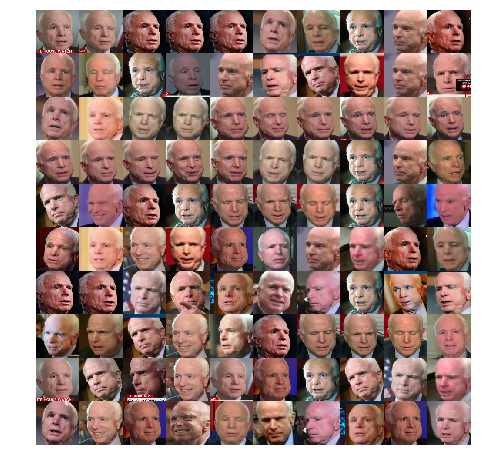

In [35]:
sorted_l2_dists = sorted(l2_dists, key=lambda x: x[1])
print(sorted_l2_dists[:100])

import cv2

def face_img(face):
    return crop(load_frame(face.person.frame.video, face.person.frame.number, []), face)

def faces_to_tiled_img(faces):
    def tile(imgs, rows=None, cols=None):
        # If neither rows/cols is specified, make a square
        if rows is None and cols is None:
            rows = int(math.sqrt(len(imgs)))

        if rows is None:
            rows = int((len(imgs) + cols - 1) / cols)
        else:
            cols = int((len(imgs) + rows - 1) / rows)

        # Pad missing frames with black
        diff = rows * cols - len(imgs)
        if diff != 0:
            imgs.extend([np.zeros(imgs[0].shape, dtype=imgs[0].dtype) for _ in range(diff)])

        return np.vstack([np.hstack(imgs[i * cols:(i + 1) * cols]) for i in range(rows)])
    
    face_imgs = par_for(face_img, faces)
    im = tile([cv2.resize(img, (100, 100)) for img in face_imgs])
    return im

im = faces_to_tiled_img(Face.objects.filter(id__in=[x[0] for x in sorted_l2_dists[:100]]))
imshow(im)
plt.show()
